In [160]:
import requests
from datetime import date, timedelta, datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns

In [ ]:
#connecting api

url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart" #api end point 

days_to_analyse = 2
currency = 'usd'

headers = {
    "accept": "application/json",
    "x-cg-demo-api-key": "CG-XNGBRE1zynSYLPRSQhjN7n2v"
}

params = {
    'vs_currency' : currency,
    'days' : str(days_to_analyse)
}

response = requests.get(url, params=params, headers=headers)
data = response.json()



In [242]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [234]:
#extract prices
def load_bitcoin_prices(days, currency = 'usd'):
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
    params = {
        'vs_currency': currency,
        'days': days
    }
    headers = {
        "accept": "application/json",
        "x-cg-demo-api-key": "CG-XNGBRE1zynSYLPRSQhjN7n2v"
    }
    response = requests.get(url, params=params, headers=headers)
    data = response.json()

    prices = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit='ms')
    prices.set_index('timestamp', inplace=True)

    return prices
    

In [243]:
#extract volumes
def load_bitcoin_volumes(days, currency = 'usd'):
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
    params = {
        'vs_currency': currency,
        'days': days
    }
    headers = {
        "accept": "application/json",
        "x-cg-demo-api-key": "CG-XNGBRE1zynSYLPRSQhjN7n2v"
    }
    response = requests.get(url, params=params, headers=headers)
    data = response.json()

    volumes = pd.DataFrame(data['total_volumes'], columns=['timestamp', 'total_volume'])
    volumes['timestamp'] = pd.to_datetime(volumes['timestamp'], unit='ms')
    volumes.set_index('timestamp', inplace=True)

    return volumes

In [246]:
def calculate_volatility(prices, days):
    results = []
    for i in range(1, days + 1):  # loop to analyse each day hourly from selected (today-n) days until today
        day = datetime.today() - timedelta(days=i) 
        next_day = day + timedelta(days=1)

        daily = prices[(prices.index >= day) & (prices.index < next_day)] #new list with prices by day
        daily= daily.copy()
        daily['return'] = daily['price'].pct_change() # calculating hourly returns for every day
        volatility = daily['return'].std() # calculating volatility for every day in week
        
        results.append({ # adding result to new the empty list
           'date': day.date(), 
         'weekday' : day.strftime('%A'),
         'volatility' : volatility
    })

    df = pd.DataFrame(results)
    df['weekday'] = pd.Categorical(df['weekday'], categories=weekday_order, ordered=True)

    return df

In [249]:
def calculate_volume(volumes, days):
    results = []
    for i in range(1,days + 1):
        day = datetime.today() - timedelta(days=i)
        next_day = day + timedelta(days=1)

        daily = volumes[(volumes.index >= day) & (volumes.index < next_day)] #new list with total_volumes by day
        daily= daily.copy()
        sum_volume = daily['total_volume'].sum() # sum hourly volumes
        results.append({ # adding result to new the empty list
         'date': day.date(),
         'weekday' : day.strftime('%A'),
         'volume' : sum_volume
    })

    df = pd.DataFrame(results) 
    df['weekday'] = pd.Categorical(df['weekday'],categories=weekday_order, ordered=True) #set right order of weekdays (default alphabetical order)

    return df


Volatility of Bitcoin for last 24 hours:0.0015


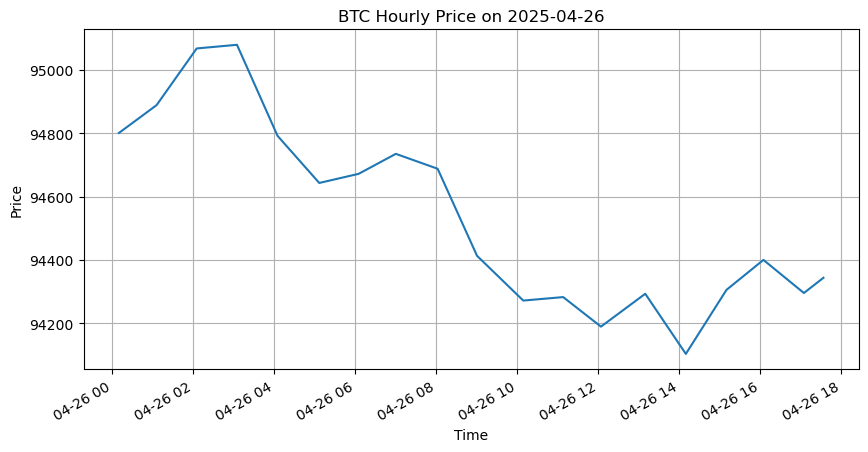

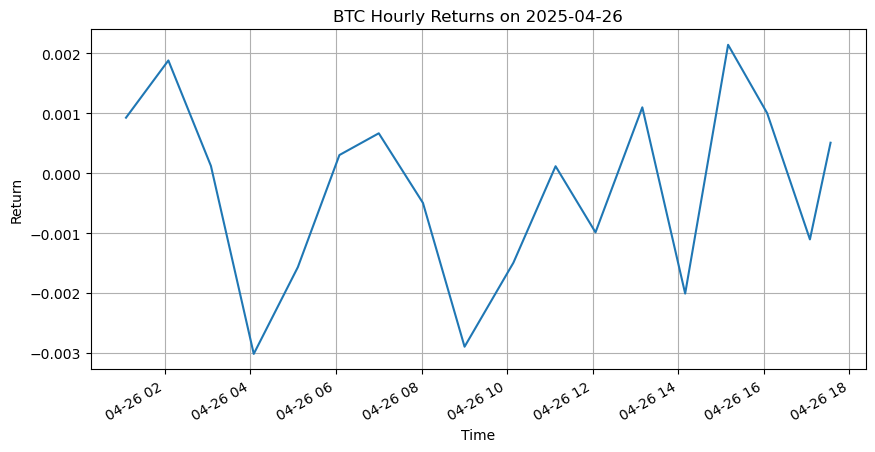

In [ ]:
#Hourly Volatility

days = 2

prices = load_bitcoin_prices(days)
day_to_analyse = datetime(datetime.today().year, datetime.today().month, datetime.today().day, 0,0,0) # setting today's datetime but resetting hours,mins and secs to zero
next_day = day_to_analyse + pd.Timedelta(days=1) # set the second day

prices = prices[(prices.index >= day_to_analyse) & (prices.index < next_day)] # deleting from dataset next_day to analyse only today's data hourly (default)
prices['return'] = prices['price'].pct_change() # calculate the percentage change from hour to hour (returns)
volatility = prices['return'].std() # calculate standard deviation of these returns (volatility)

print(f'Volatility of Bitcoin for last 24 hours:{volatility:.4f}')

prices['price'].plot(title=f'BTC Hourly Price on {day_to_analyse.date()}', figsize=(10,5))  # visualising price
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()

prices['return'].plot(title=f'BTC Hourly Returns on {day_to_analyse.date()}',figsize=(10,5)) #visualising returns
plt.xlabel('Time')
plt.ylabel('Return')
plt.grid(True)
plt.show()


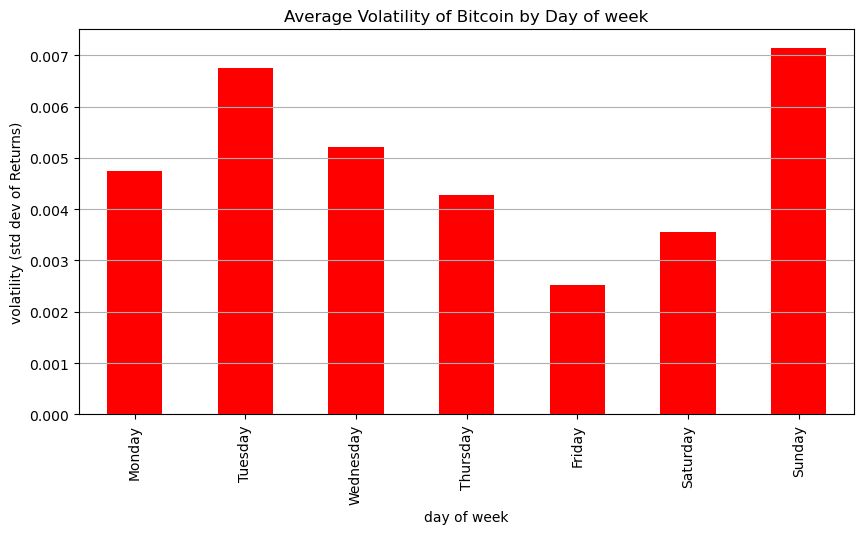

In [ ]:
#Weekly Volatility 

days = 30

prices = load_bitcoin_prices(days)

df = calculate_volatility(prices, days)

grouped = df.groupby('weekday', observed=True)['volatility'].mean() # group calculated average volatilities by weekday

plt.figure(figsize=(10,5))
grouped.plot(kind='bar', color='red')
plt.title('Average Volatility of Bitcoin by Day of week')
plt.xlabel('day of week')
plt.ylabel('volatility (std dev of Returns)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


                         total_volume
timestamp                            
2025-04-26 00:09:38.633  3.961432e+10
2025-04-26 01:05:32.469  3.957060e+10
2025-04-26 02:04:57.126  3.706308e+10
2025-04-26 03:04:39.206  3.805772e+10
2025-04-26 04:04:42.650  3.640857e+10
2025-04-26 05:06:35.268  3.612089e+10
2025-04-26 06:04:51.081  3.612875e+10
2025-04-26 07:00:03.751  3.641109e+10
2025-04-26 08:02:02.029  3.492494e+10
2025-04-26 09:00:22.845  3.446165e+10
2025-04-26 10:08:52.585  3.434231e+10
2025-04-26 11:08:01.761  3.367372e+10
2025-04-26 12:04:02.061  3.254054e+10
2025-04-26 13:09:40.469  2.972480e+10
2025-04-26 14:09:47.356  2.793685e+10
2025-04-26 15:09:59.427  2.227986e+10
2025-04-26 16:04:46.285  2.041877e+10
2025-04-26 17:04:44.853  1.942746e+10
2025-04-26 17:39:28.000  1.890557e+10


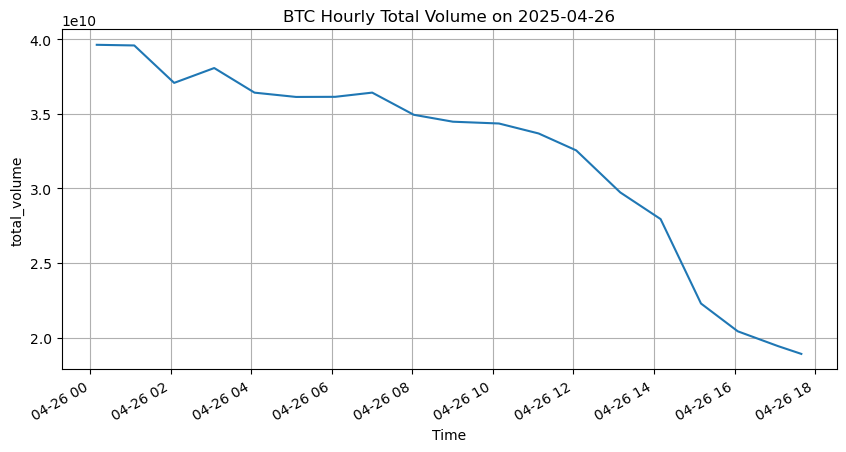

In [240]:
#Hourly Total Volume

days = 2
volumes = load_bitcoin_volumes(days)

day_to_analyse = datetime(datetime.today().year, datetime.today().month, datetime.today().day, 0,0,0)
next_day = day_to_analyse + pd.Timedelta(days=1)
total_volumes = volumes[(volumes.index >= day_to_analyse) & (volumes.index < next_day)] 
print(total_volumes)

total_volumes['total_volume'].plot(title=f'BTC Hourly Total Volume on {day_to_analyse.date()}', figsize=(10,5))  # visualising price
plt.xlabel('Time')
plt.ylabel('total_volume')
plt.grid(True)
plt.show()


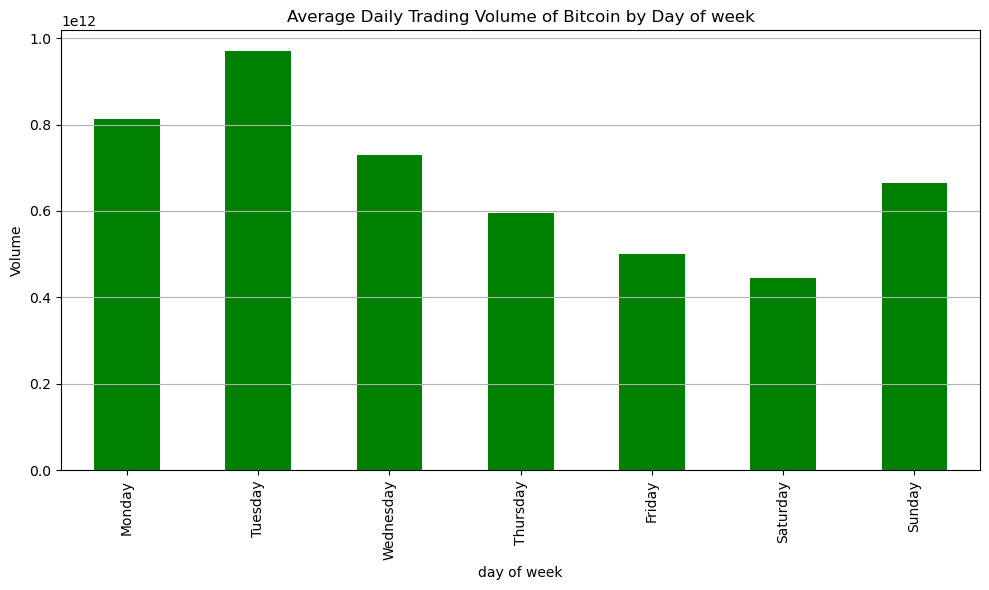

In [251]:
#Weekly Total Volume

days = 14

volumes = load_bitcoin_volumes(days)

df = calculate_volume(volumes,days)

grouped = df.groupby('weekday', observed=True)['volume'].mean() # grouping and caclulating avg of volumes by weekday

grouped.plot(kind='bar', color='green',figsize=(10,6))
plt.title('Average Daily Trading Volume of Bitcoin by Day of week')
plt.xlabel('day of week')
plt.ylabel('Volume')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Correlation: 0.687400
P_Value: 0.000027


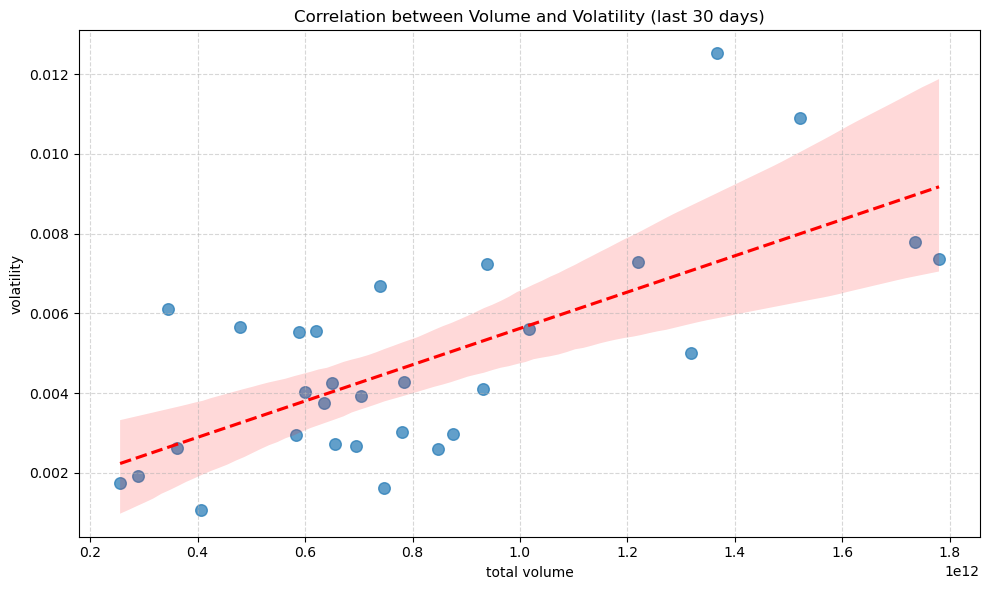

In [255]:
#Correlation of Volume and Volatility

days = 30

response = requests.get(url, params=params, headers=headers)
data = response.json()

#extracting price data
prices = load_bitcoin_prices(days)

#extracting total volume data
volumes = load_bitcoin_volumes(days)

#calculating volatilily and volumes for each day
result_volume = calculate_volume(volumes, days)
result_volat = calculate_volatility(prices,days)

full_result = pd.merge(result_volume[['date', 'volume','weekday']], result_volat[['date','volatility']],on='date')

plt.figure(figsize=(10,6))
sns.regplot(x='volume', 
            y='volatility', 
            data=full_result, ci=95, 
            scatter_kws={'s' : 70, 'alpha' : 0.7}, 
            line_kws={'color': 'red', 'linestyle' : '--'})

plt.title(f'Correlation between Volume and Volatility (last {days} days)')
plt.xlabel('total volume')
plt.ylabel('volatility')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

corr , p_value = pearsonr(full_result['volume'], full_result['volatility'])
print(f'Correlation: {corr:4f}')
print(f'P_Value: {p_value:4f}')

                         total_volume   weekday  hour
timestamp                                            
2025-04-12 19:04:58.709  2.351961e+10  Saturday    19
2025-04-12 20:05:42.931  2.247509e+10  Saturday    20
2025-04-12 21:04:59.076  2.097979e+10  Saturday    21
2025-04-12 22:04:56.253  2.261216e+10  Saturday    22
2025-04-12 23:01:23.055  2.243752e+10  Saturday    23
...                               ...       ...   ...
2025-04-26 15:09:59.427  2.227986e+10  Saturday    15
2025-04-26 16:04:46.285  2.041877e+10  Saturday    16
2025-04-26 17:04:44.853  1.942746e+10  Saturday    17
2025-04-26 18:02:44.127  1.801342e+10  Saturday    18
2025-04-26 18:56:00.000  1.716474e+10  Saturday    18

[337 rows x 3 columns]


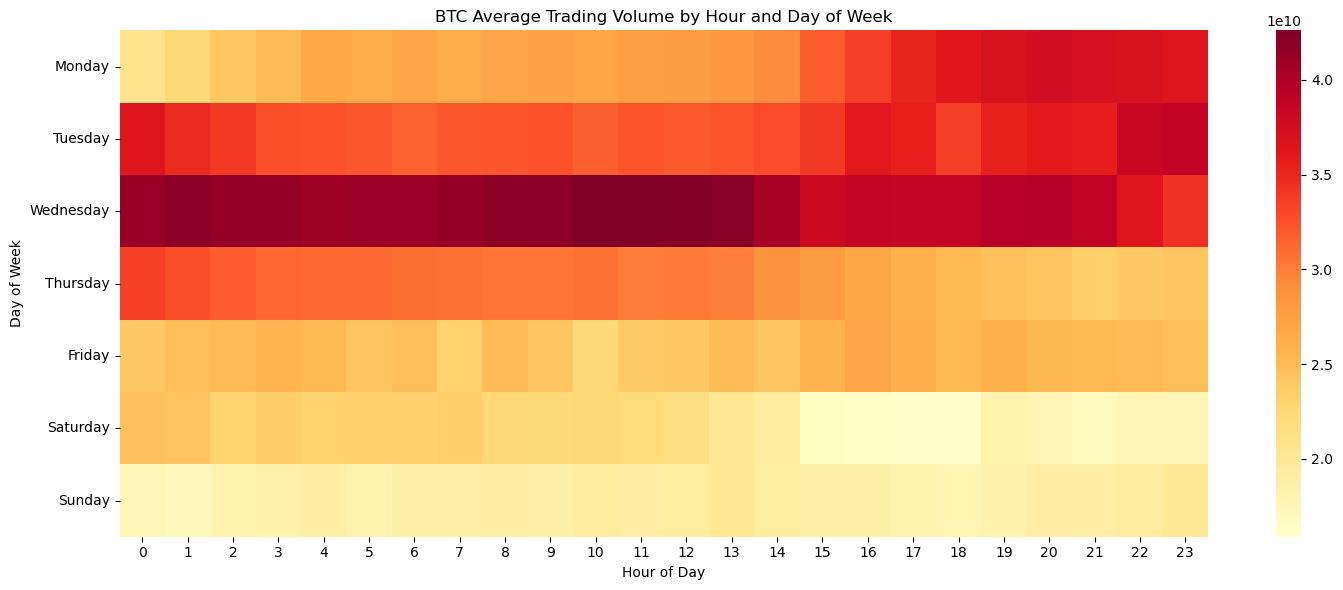

In [259]:
#heatmap volume by hour and weekday

days = 14

volumes = load_bitcoin_volumes(days)
volumes['weekday'] = volumes.index.day_name()
volumes['hour'] = volumes.index.hour
print(volumes)

pivot_table = volumes.pivot_table(index='weekday',columns='hour', values='total_volume', aggfunc='mean')
pivot_table = pivot_table.reindex(weekday_order)

plt.figure(figsize=(15,6))
sns.heatmap(pivot_table, cmap='YlOrRd')
plt.title('BTC Average Trading Volume by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


hour       0         1         2         3         4         5         6   \
weekday                                                                     
Monday    NaN  0.006448  0.006547  0.007628  0.004380  0.002478  0.005466   
Tuesday   NaN  0.001551  0.005593  0.001814  0.002371  0.003173  0.001156   
Wednesday NaN  0.000975  0.004285  0.001500  0.003870  0.003154  0.002220   
Thursday  NaN  0.002888  0.000054  0.002421  0.000954  0.000686  0.005709   
Friday    NaN  0.001022  0.002603  0.004583  0.002640  0.000705  0.001285   
Saturday  NaN  0.000803  0.000431  0.001699  0.003154  0.002495  0.000002   
Sunday    NaN  0.000997  0.002242  0.000494  0.002326  0.006681  0.000475   

hour             7         8         9   ...        14        15        16  \
weekday                                  ...                                 
Monday     0.001012  0.000525  0.000137  ...  0.006616  0.002015  0.011424   
Tuesday    0.000240  0.000118  0.000828  ...  0.010543  0.008216  0.0037

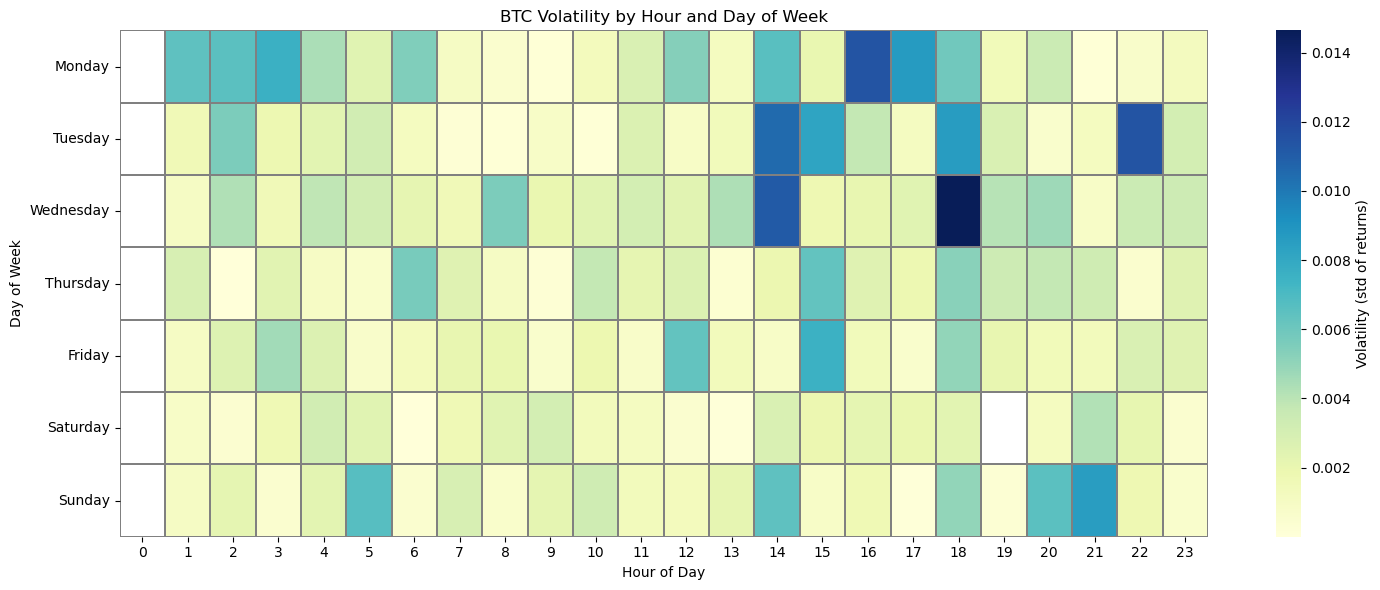

In [ ]:
#heatmap volatility by hour and weekday
days = 14

prices = load_bitcoin_prices(days)
prices['weekday'] = prices.index.day_name()
prices['hour'] = prices.index.hour
prices['date'] = prices.index.date

prices['return'] = prices.groupby('date')['price'].pct_change()
vol_table = prices.groupby(['weekday','hour'])['return'].std().unstack()
vol_table= vol_table.reindex(weekday_order)

print(vol_table)
plt.figure(figsize=(15,6))
sns.heatmap(vol_table, cmap='YlGnBu', annot=False, linewidths=0.3,linecolor='gray', cbar_kws={'label':'Volatility (std of returns)'})
plt.title('BTC Volatility by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

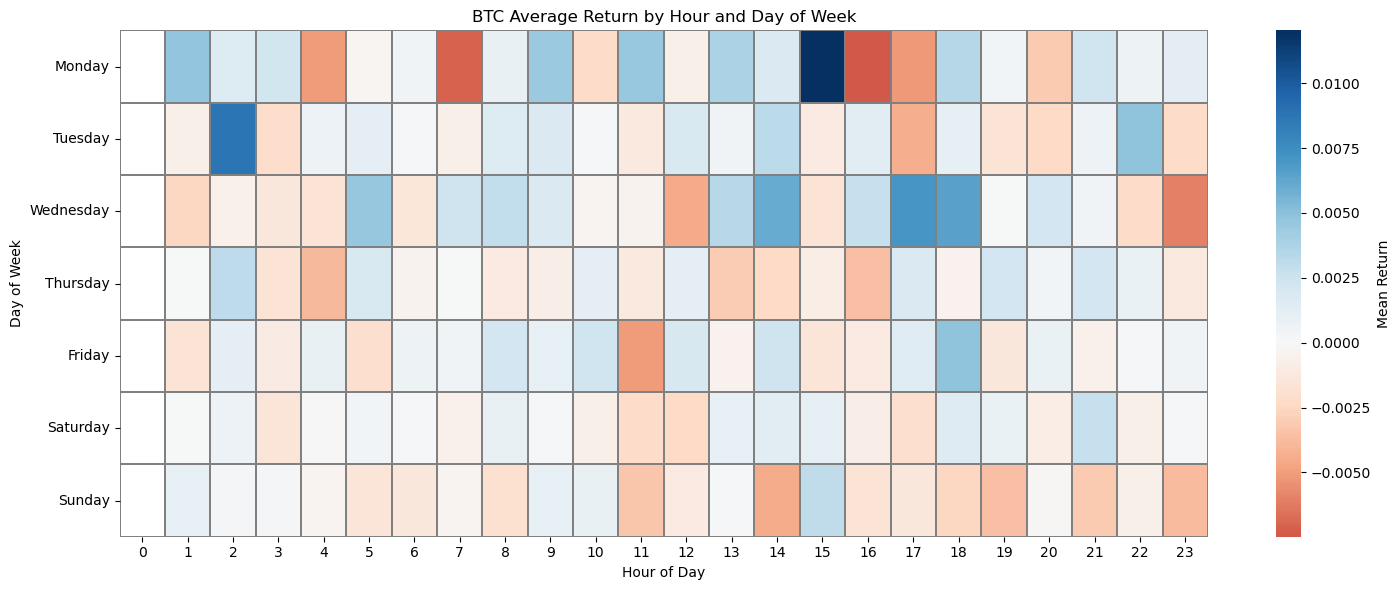

In [270]:
#heatmap returns by hour and weekday

days = 30

prices = load_bitcoin_prices(days)
prices['weekday'] = prices.index.day_name()
prices['hour'] = prices.index.hour
prices['date'] = prices.index.date
prices['return'] = prices.groupby('date')['price'].pct_change()

returns_table= prices.groupby(['weekday','hour'])['return'].mean().unstack()
returns_table= returns_table.reindex(weekday_order) #set right order of weekdays (default alphabetical order)

plt.figure(figsize=(15,6))
sns.heatmap(returns_table, cmap='RdBu',center=0, annot=False, linewidths=0.3,linecolor='gray', cbar_kws={'label':'Mean Return'})
plt.title('BTC Average Return by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

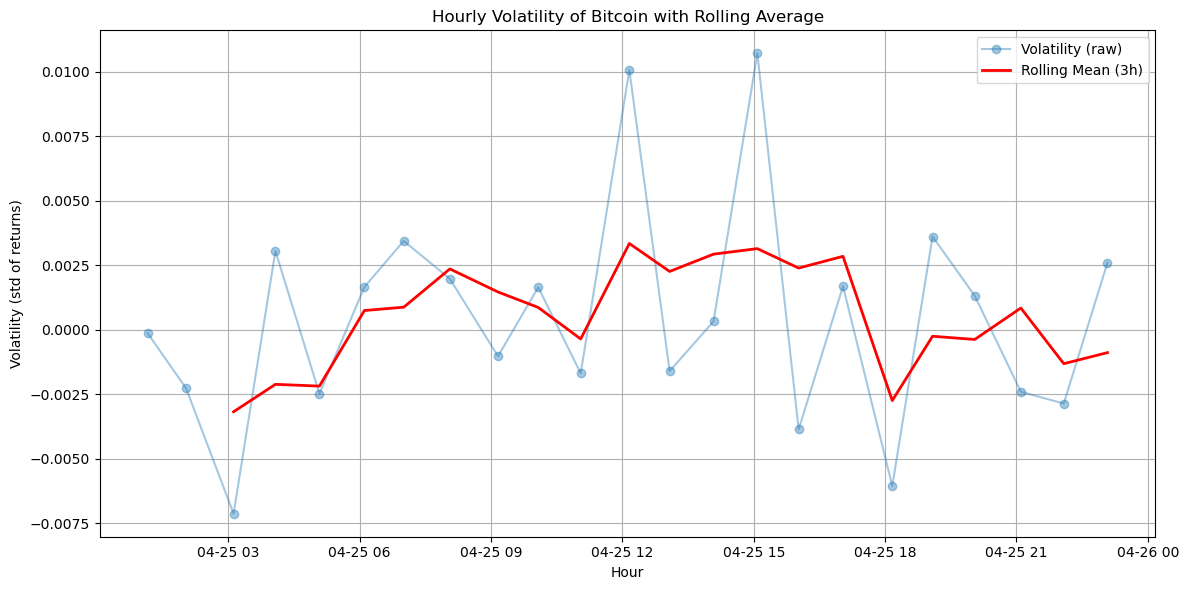

In [ ]:
#moving average volatility hourly

days = 2

prices = load_bitcoin_prices(days)

yesterday = pd.Timestamp.today().normalize() - pd.Timedelta(days=1) #make analyse only for one day (here for yesterday)
today = pd.Timestamp.today().normalize()
df_day = prices[(prices.index >= yesterday) & (prices.index < today)].copy()

df_day['return'] = df_day['price'].pct_change()
df_day['vol'] = df_day['return'].std()
df_day['rolling_vol'] = df_day['return'].rolling(window=3).mean() #creating moving average with window 3

plt.figure(figsize=(12, 6))
plt.plot(df_day.index, df_day['return'], label='Volatility (raw)', marker='o', alpha=0.4)
plt.plot(df_day.index, df_day['rolling_vol'], label='Rolling Mean (3h)', color='red', linewidth=2)
plt.title('Hourly Volatility of Bitcoin with Rolling Average')
plt.xlabel('Hour')
plt.ylabel('Volatility (std of returns)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


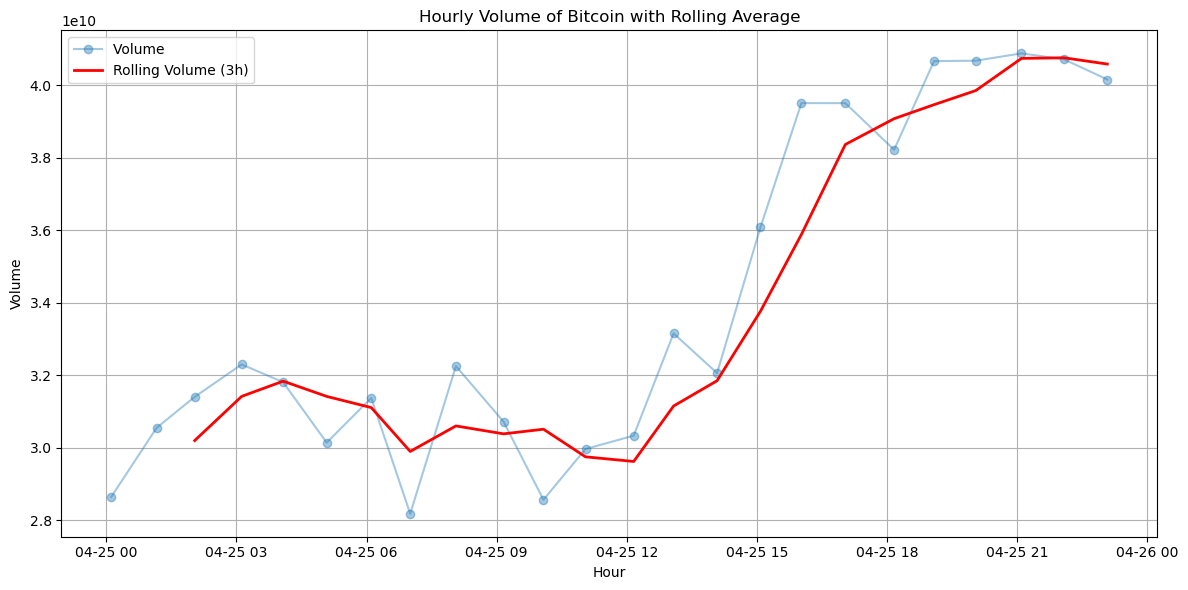

In [ ]:
#moving average volume hourly

days = 2

volumes = load_bitcoin_volumes(days)

yesterday = pd.Timestamp.today().normalize() - pd.Timedelta(days=1) #make analyse only for one day (here for yesterday)
today = pd.Timestamp.today().normalize()

df_day = volumes[(volumes.index >= yesterday) & (volumes.index < today)].copy()
df_day['rolling_volume'] = df_day['total_volume'].rolling(window=3).mean() #creating moving average with window 3

plt.figure(figsize=(12, 6))
plt.plot(df_day.index, df_day['total_volume'], label='Volume ', marker='o', alpha=0.4)
plt.plot(df_day.index, df_day['rolling_volume'], label='Rolling Volume (3h)', color='red', linewidth=2)
plt.title('Hourly Volume of Bitcoin with Rolling Average')
plt.xlabel('Hour')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

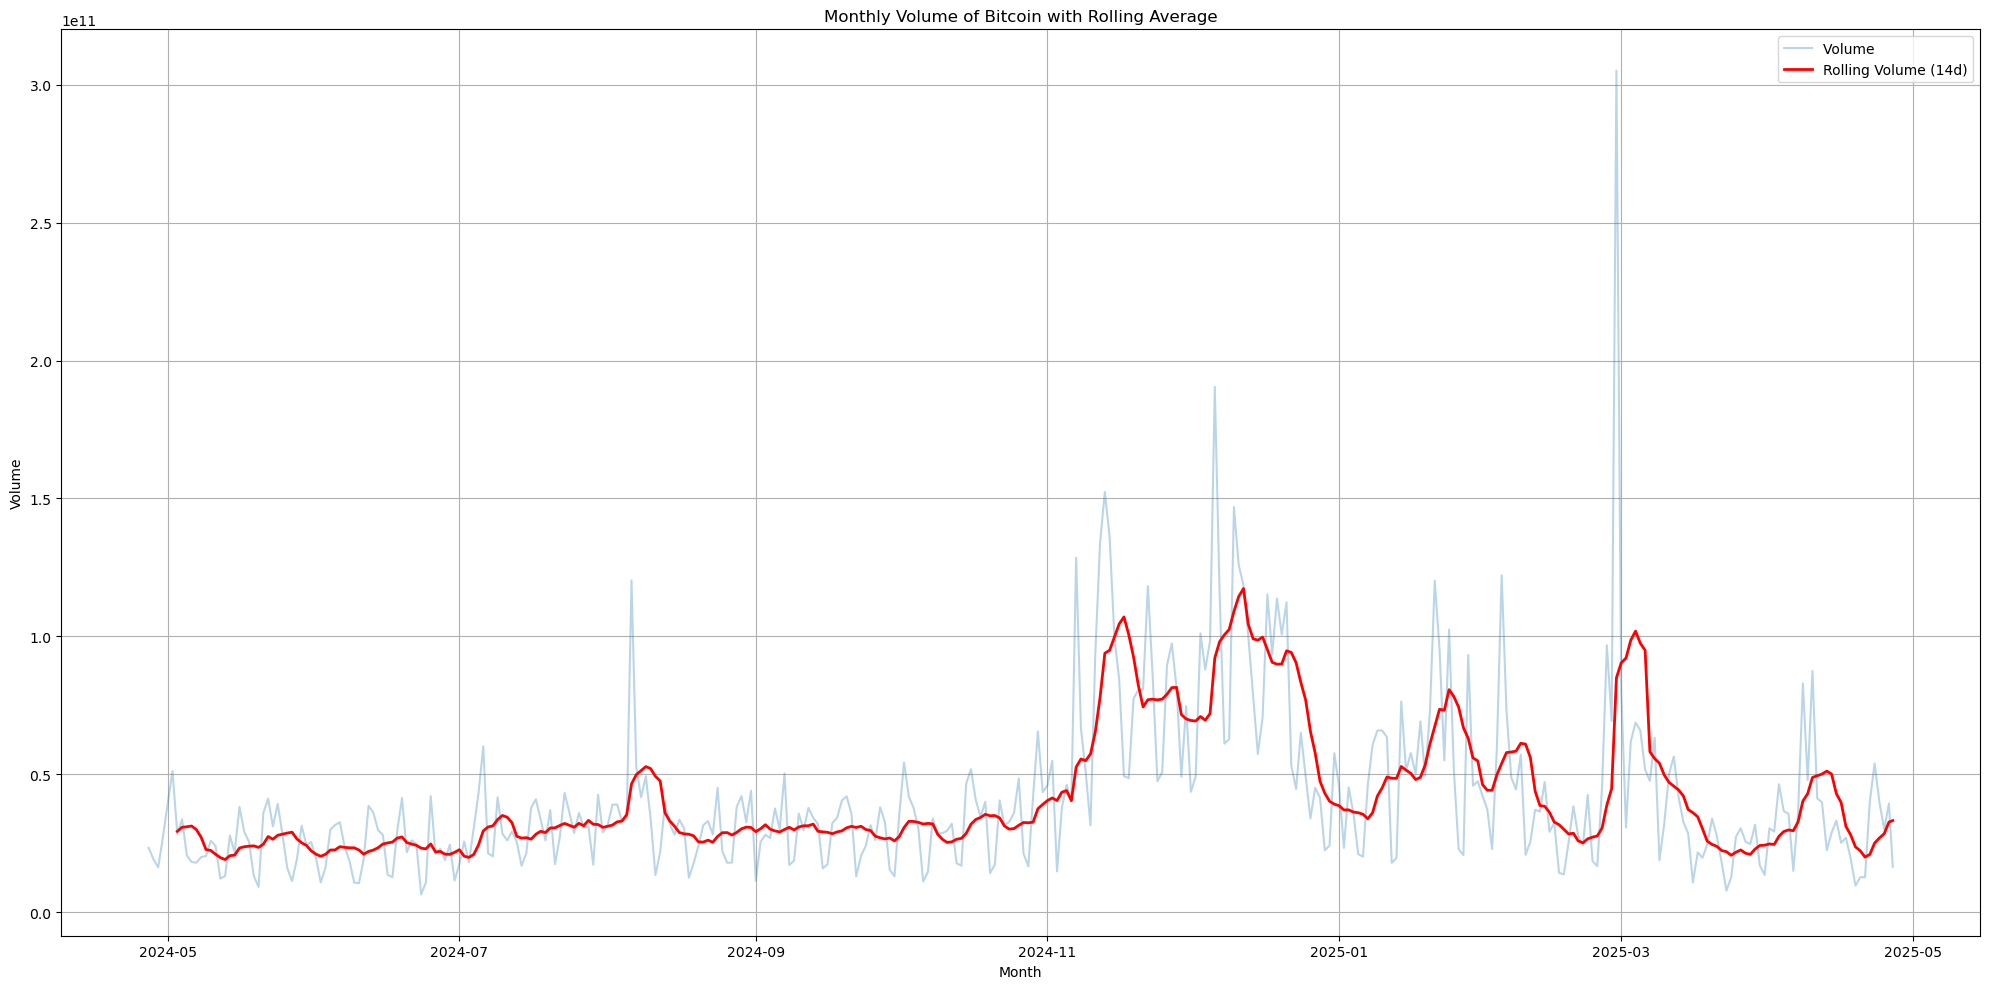

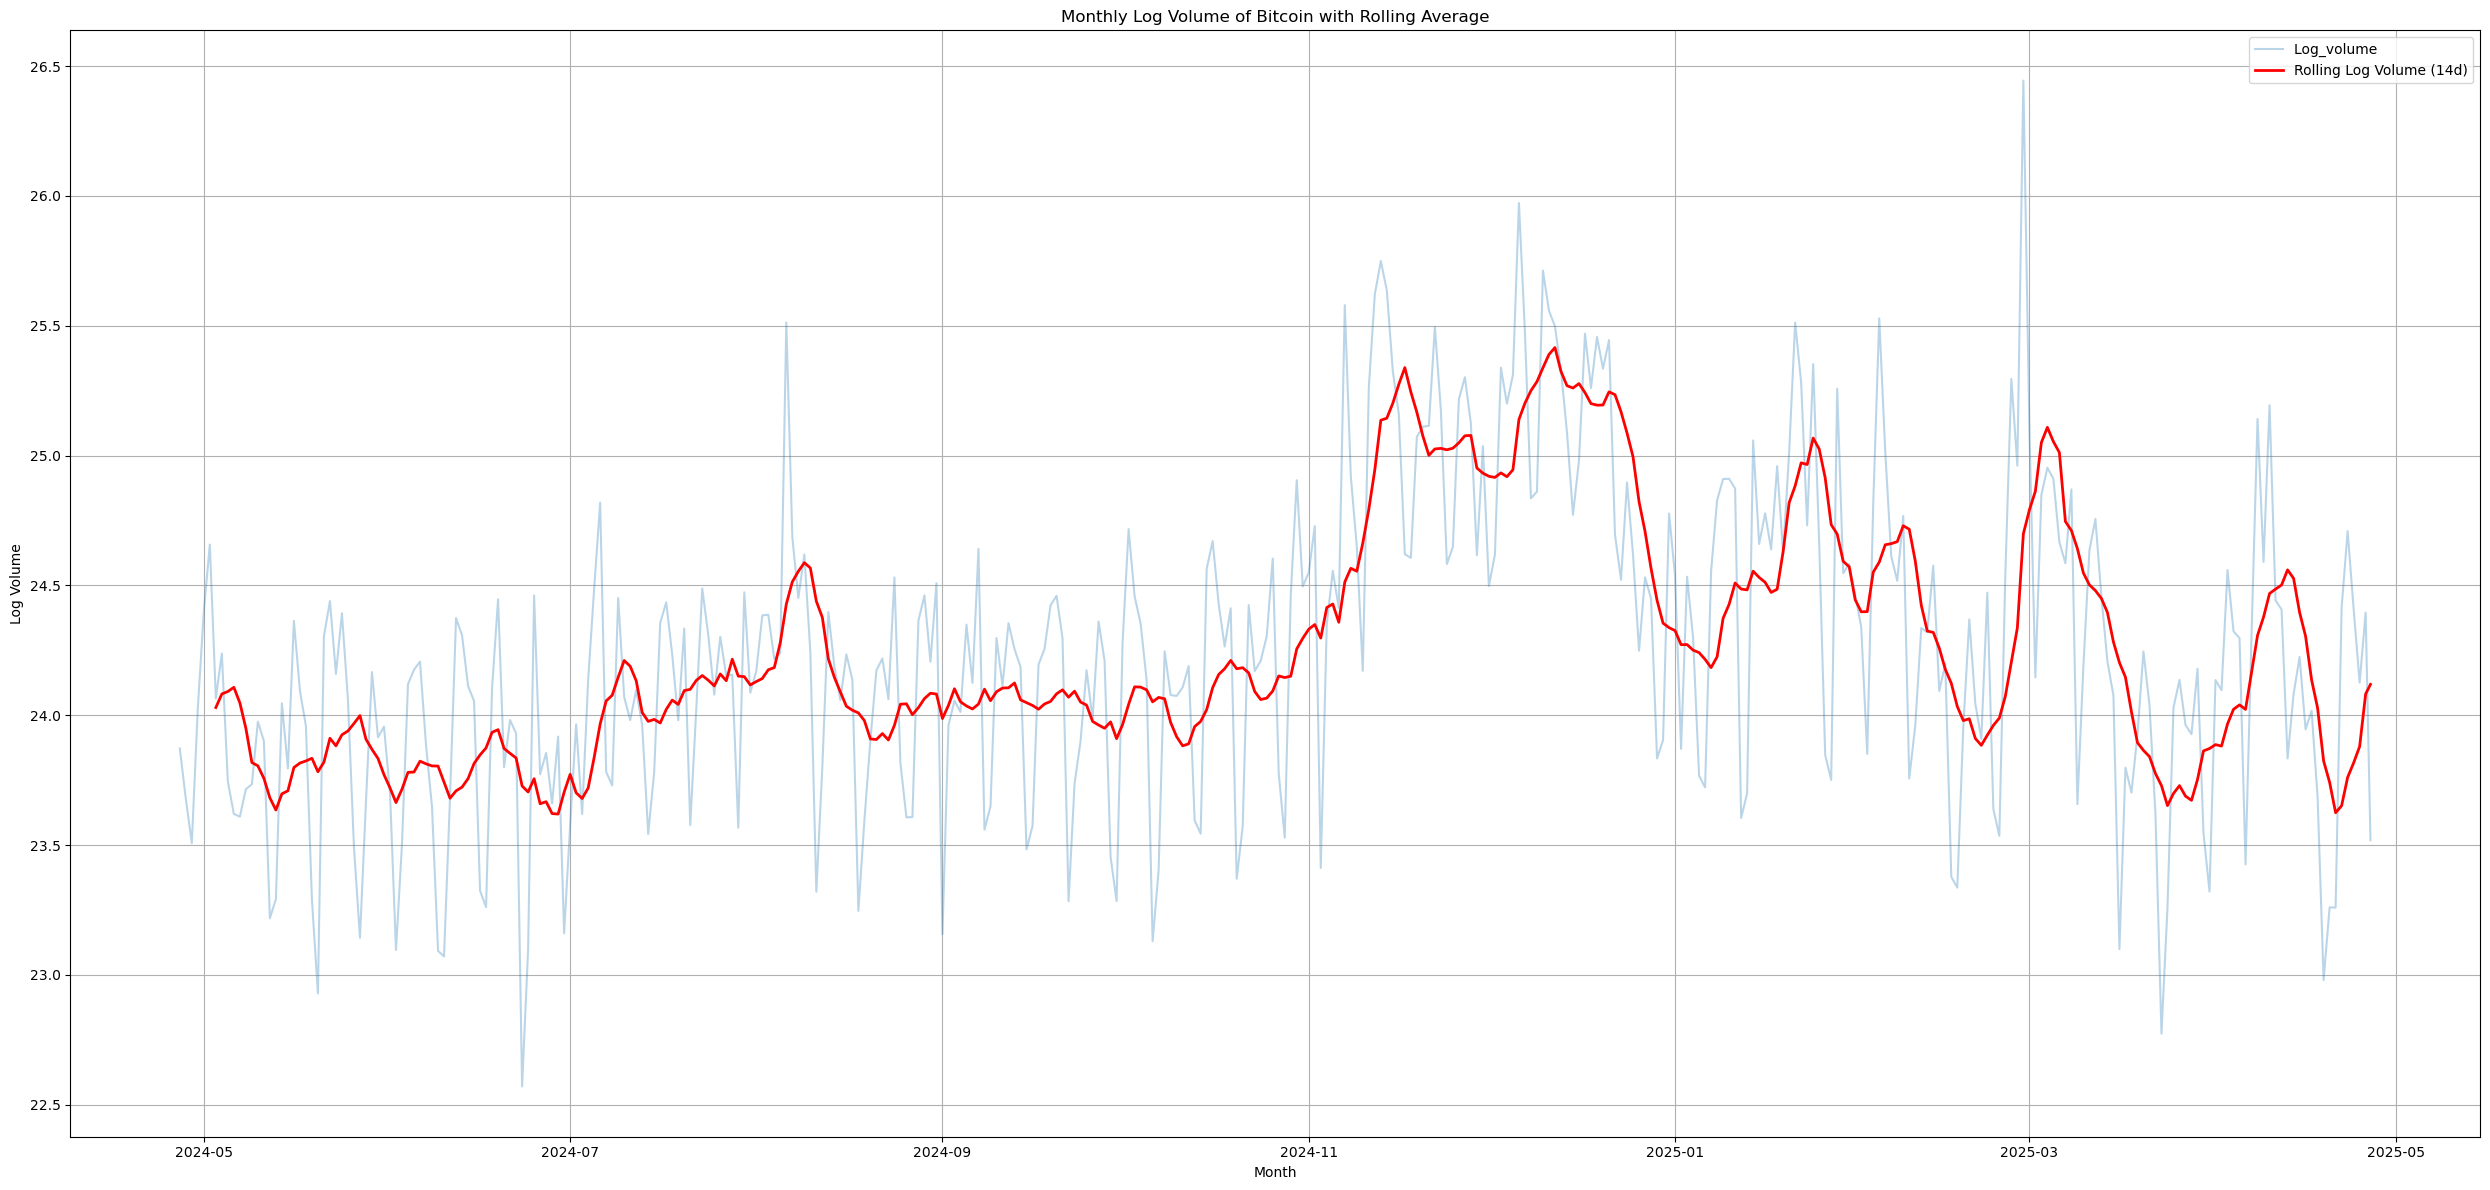

In [ ]:
#moving average volume for year

days = 365

volumes = load_bitcoin_volumes(days)

#print(volumes)
volumes['rolling_volume'] = volumes['total_volume'].rolling(window=7).mean() #creating moving average with window 3
volumes['log_volume'] = np.log1p(volumes['total_volume'])
volumes['rolling_log_volume'] = volumes['log_volume'].rolling(window=7).mean()

plt.figure(figsize=(20, 10))
plt.plot(volumes.index, volumes['total_volume'], label='Volume ', alpha=0.3)
plt.plot(volumes.index, volumes['rolling_volume'], label='Rolling Volume (14d)', color='red', linewidth=2)
plt.title('Monthly Volume of Bitcoin with Rolling Average')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(25, 12))
plt.plot(volumes.index, volumes['log_volume'], label='Log_volume ', alpha=0.3)
plt.plot(volumes.index, volumes['rolling_log_volume'], label='Rolling Log Volume (14d)', color='red', linewidth=2)
plt.title('Monthly Log Volume of Bitcoin with Rolling Average')
plt.xlabel('Month')
plt.ylabel('Log Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

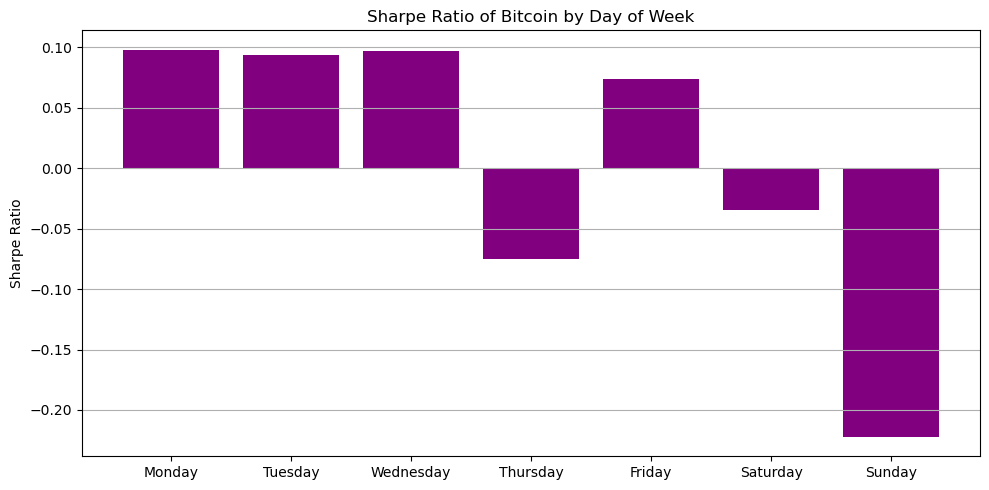

In [ ]:
# Sharpe Ratio by Weekday

days = 30

df_ratio = load_bitcoin_prices(days)
df_ratio['return'] = df_ratio['price'].pct_change()
df_ratio['weekday'] = df_ratio.index.day_name()

sharpe_by_day = df_ratio.groupby('weekday').agg( #grouping by weekday and calculating avg returns by weekday and volatility
    mean_return=('return', 'mean'),
    volatility=('return', 'std')
)

sharpe_by_day['sharpe_ratio'] = sharpe_by_day['mean_return'] / sharpe_by_day['volatility'] # calculating sharpe ratio for each weekday
sharpe_by_day = sharpe_by_day.loc[weekday_order]

plt.figure(figsize=(10, 5))
plt.bar(sharpe_by_day.index, sharpe_by_day['sharpe_ratio'], color='purple')
plt.title('Sharpe Ratio of Bitcoin by Day of Week')
plt.ylabel('Sharpe Ratio')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


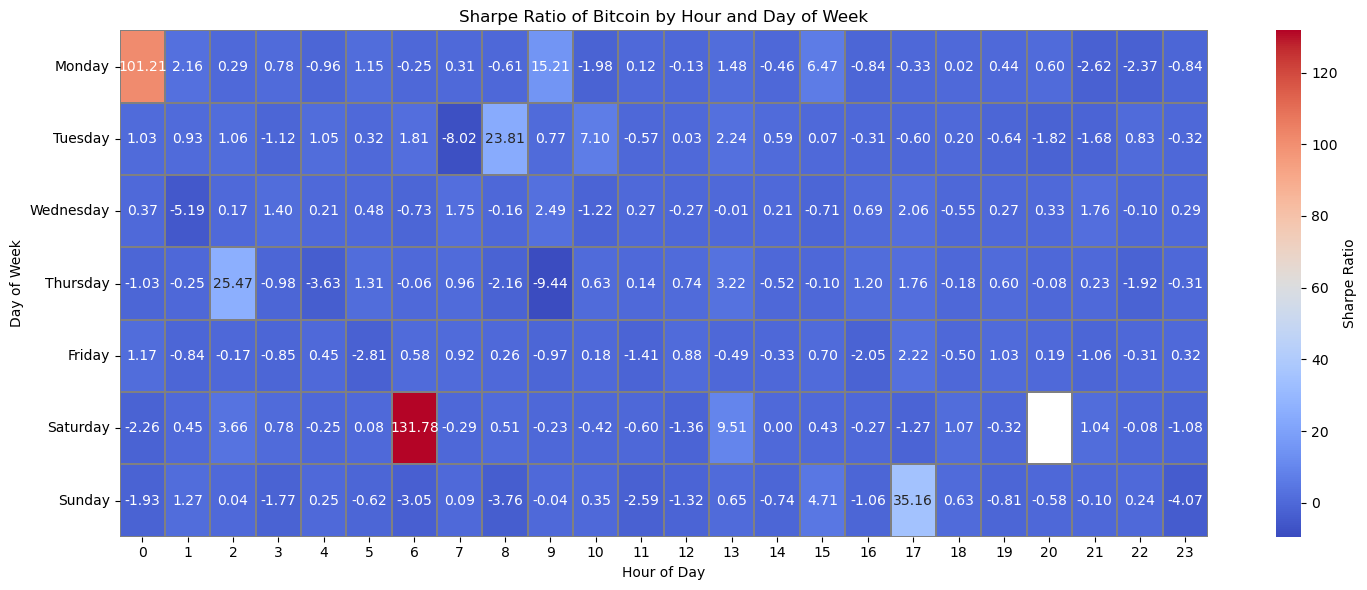

In [290]:
# heatmap sharpe ratio

days = 14

prices = load_bitcoin_prices(days)
prices['return'] = prices['price'].pct_change()
prices['weekday'] = prices.index.day_name()
prices['hour'] = prices.index.hour

grouped = prices.groupby(['weekday', 'hour']).agg(
    mean_return=('return', 'mean'),
    volatility=('return', 'std')
)

grouped['sharpe_ratio'] = grouped['mean_return'] / grouped['volatility']

pivot_table = grouped['sharpe_ratio'].unstack()
pivot_table = pivot_table.reindex(weekday_order)


plt.figure(figsize=(15,6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.3, linecolor='gray', cbar_kws={'label': 'Sharpe Ratio'})
plt.title('Sharpe Ratio of Bitcoin by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()